<a href="https://colab.research.google.com/github/allandsouza13/Intelligence-Systems/blob/main/Python_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is our implementation for Introduction to intelligent systems CW1, We shall be using the Iris Dataset, the K Nearest Neighbor, Decision tree and Convulated Neural Network algorithms.

**// K-Nearest Neigbor implementation by Hishaam Mehmood**

In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.datasets import load_iris #importing the iris dataset
iris = load_iris()

In [ ]:
type(iris)



sklearn.utils._bunch.Bunch

In [ ]:
first_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
first_data.shape # shows that there 5 features in the iris dataset, SepalLengthCm, SepalWidthCm, PetalLengthCm, PetalWidthCm, Species, and 150 rows

(150, 5)

In [ ]:
first_data.head() # displays the first few rows in the iris dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
first_data['target'].value_counts() # shows the different cateogories - 0 is setosa, 1 is versicolor and 2 is virginica. This shows that there are 50 of each

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [ ]:
# adding the species column to the dataset using classification
def categorize(a):
    if a == 0.0:
        return('setosa')
    if a == 1.0:
        return('versicolor')
    return('virginica')
first_data['Species'] = first_data['target'].apply(categorize)

In [ ]:
first_data.head() # the speciies column is now shown in the output

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


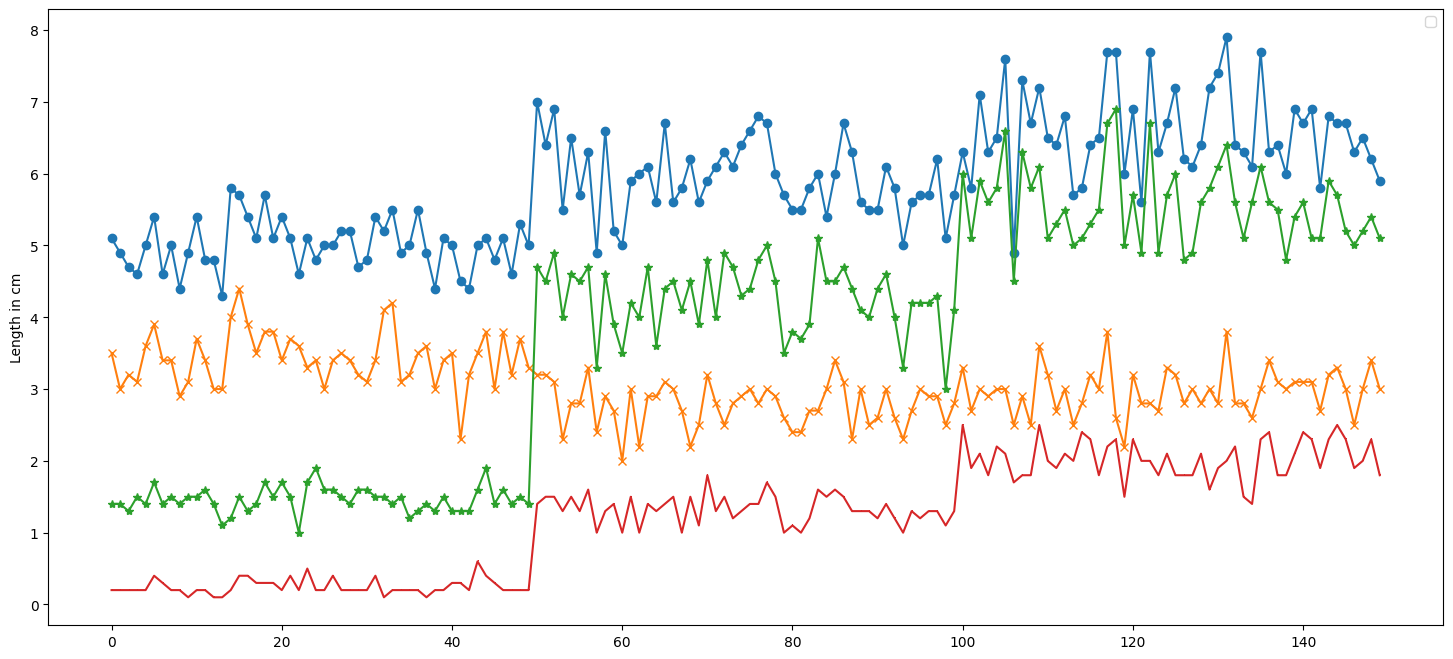

In [ ]:
plt.figure(figsize=[18,8])
plt.plot(first_data['sepal length (cm)'], marker= 'o')
plt.plot(first_data['sepal width (cm)'], marker= 'x')
plt.plot(first_data['petal length (cm)'], marker= '*')
plt.plot(first_data['petal width (cm)'], marker= ',')
plt.ylabel('Length in cm')
plt.legend()
plt.show()

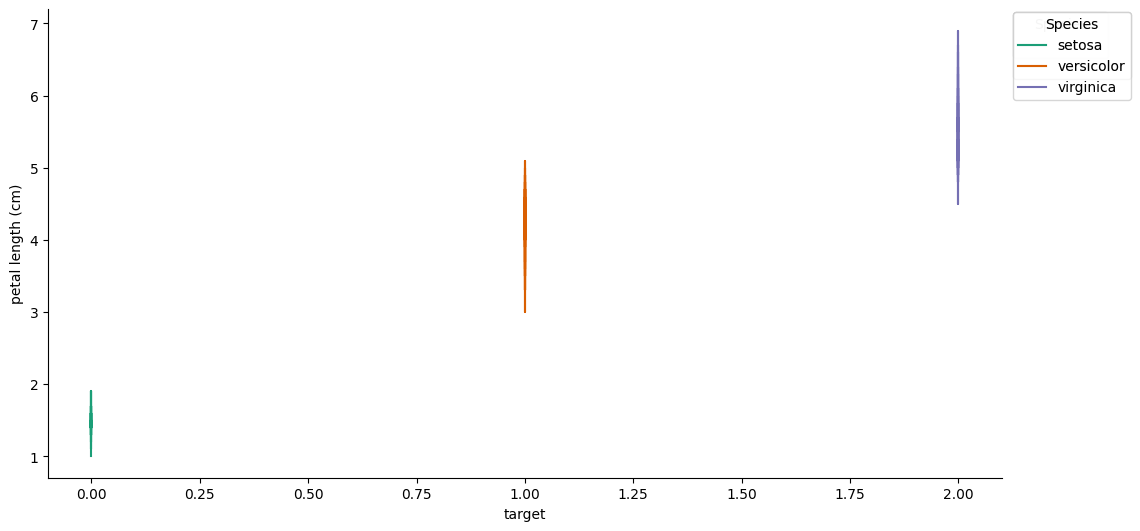

In [ ]:
# @title target vs petal length (cm)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['petal length (cm)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = first_data.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Species')):
  _plot_series(series, series_name, i)
  fig.legend(title='Species', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('petal length (cm)')

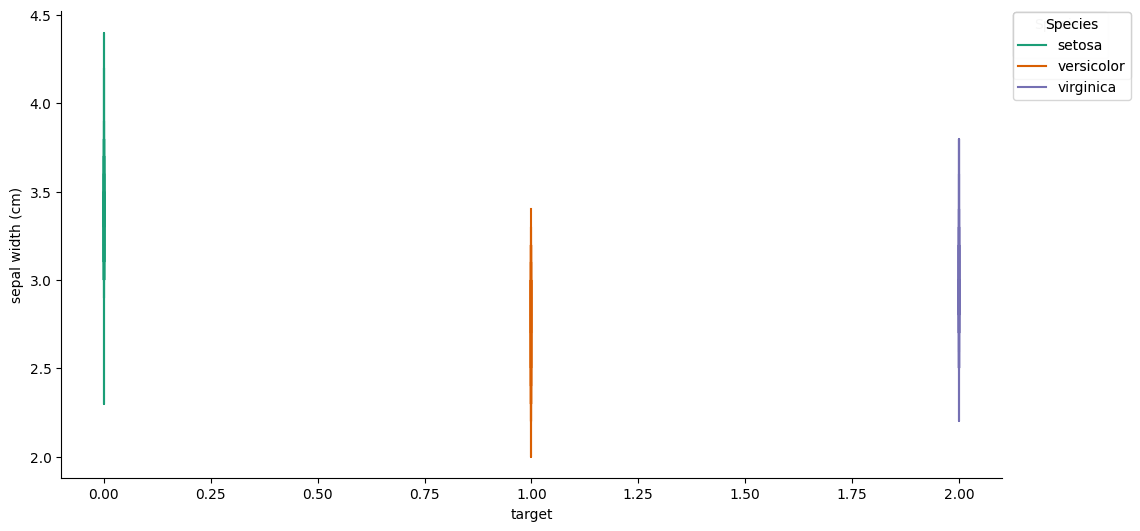

In [ ]:
# @title target vs sepal width (cm)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['sepal width (cm)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = first_data.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Species')):
  _plot_series(series, series_name, i)
  fig.legend(title='Species', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('sepal width (cm)')

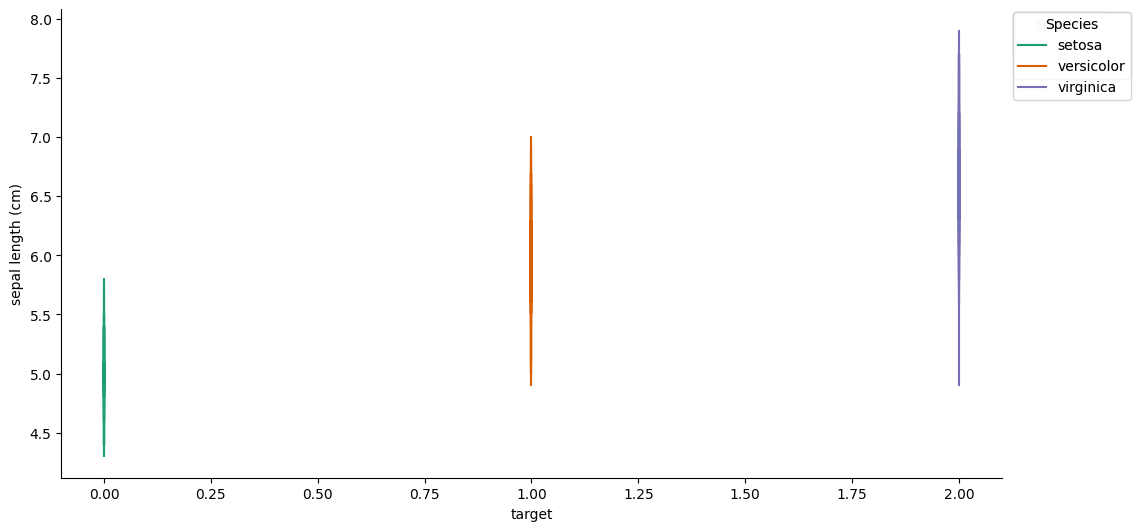

In [ ]:
# @title target vs sepal length (cm)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['target']
  ys = series['sepal length (cm)']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = first_data.sort_values('target', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Species')):
  _plot_series(series, series_name, i)
  fig.legend(title='Species', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('target')
_ = plt.ylabel('sepal length (cm)')

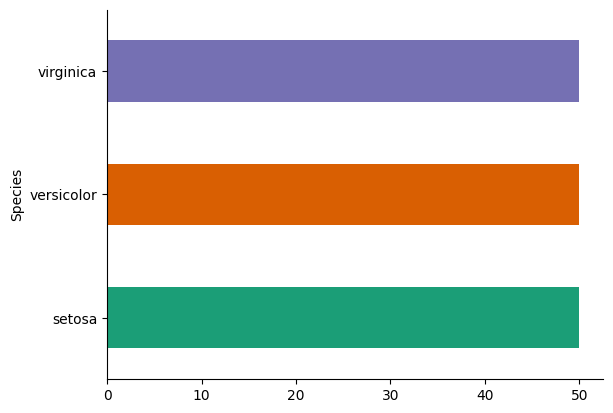

In [ ]:
# @title Species

from matplotlib import pyplot as plt
import seaborn as sns
first_data.groupby('Species').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
 # Splitting the data into Training data and test data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(first_data[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], first_data['Species'], random_state=0 )

In [ ]:
x_train.head() # displays the first few rows of the training data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [ ]:
y_train.head()

61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

In [ ]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [ ]:
y_test.head()

114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

This is where we shall import the KNN algorithm to classify the data to the near K neighbor point and identify the species


In [ ]:
from sklearn.neighbors import KNeighborsClassifier # importing the KNN classifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(x_train, y_train) # fitting the KNN with training data

KNeighborsClassifier(n_neighbors=1)

In [ ]:
prediction = knn.predict(x_test) # Predicting the y species values

In [ ]:
prediction # displays the predictions

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [ ]:
y_test + "  " +  prediction # Compares the predicted data from the test and y test data.

114      virginica  virginica
62     versicolor  versicolor
33             setosa  setosa
107      virginica  virginica
7              setosa  setosa
100      virginica  virginica
40             setosa  setosa
86     versicolor  versicolor
76     versicolor  versicolor
71     versicolor  versicolor
134      virginica  virginica
51     versicolor  versicolor
73     versicolor  versicolor
54     versicolor  versicolor
63     versicolor  versicolor
37             setosa  setosa
78     versicolor  versicolor
90     versicolor  versicolor
45             setosa  setosa
16             setosa  setosa
121      virginica  virginica
66     versicolor  versicolor
24             setosa  setosa
8              setosa  setosa
126      virginica  virginica
22             setosa  setosa
44             setosa  setosa
97     versicolor  versicolor
93     versicolor  versicolor
26             setosa  setosa
137      virginica  virginica
84     versicolor  versicolor
27             setosa  setosa
127      v

In [ ]:
# Testing the model using new test data
X_new = np.array([[5, 2.9, 1, 0.2]])


In [ ]:
predection_test = knn.predict(X_new)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predection_test

array(['setosa'], dtype=object)

**// Decision tree implementation by Allan Dsouza**




In [ ]:
# Import the Iris dataset from the sklearn, along with other libraries
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
# Loading the Iris dataset to a variable
iris = load_iris()
# Loading the data into 2 different dataframes.

# X for the features
X = pd.DataFrame(iris.data, columns=iris.feature_names)
# y for the targets
y = pd.Categorical.from_codes(iris.target, iris.target_names)

In [ ]:
# Displays data for the first few rows of the features
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
print(y) # displays the targets, shows that there are 150 rows and 3 categories of species


['setosa', 'setosa', 'setosa', 'setosa', 'setosa', ..., 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']
Length: 150
Categories (3, object): ['setosa', 'versicolor', 'virginica']


In [ ]:
# Convert categorical data into dummy/indicator variables.
y = pd.get_dummies(y)

In [ ]:
y.head()


,setosa,versicolor,virginica
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False


In [ ]:
# importing the training library
from sklearn.model_selection import train_test_split

# Splitting the data into the training sets and testing sets

# Each set has a pair of X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
# Importing and creating the model
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Training our model with our training data.
dt.fit(X_train, y_train)

DecisionTreeClassifier()

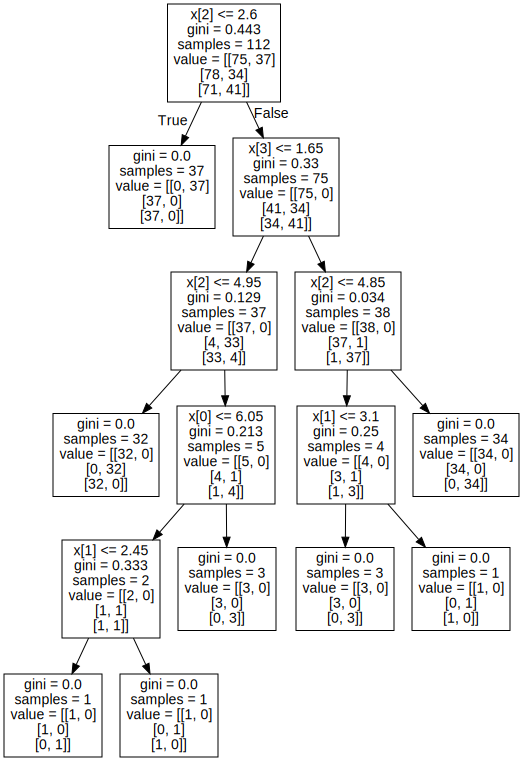

In [ ]:
# Create a visual of our model
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

display(graphviz.Source(export_graphviz(dt)))

In [ ]:
# Calls the .predict() function of the model and feeds it the training data
y_pred = dt.predict(X_test)

In [ ]:
# The confusion matrix is going to tell us how many samples of each type were classified and  which target type.

from sklearn.metrics import confusion_matrix
species = np.array(y_test).argmax(axis=1)
predictions = np.array(y_pred).argmax(axis=1)
confusion_matrix(species, predictions)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

**// Convolutional Neural Network Implementation by Joel and Denilson**

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import os

# libraries used for visuals
import matplotlib.pyplot as plt

# SKLearn libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow libraries
import tensorflow as tf
import seaborn as sns
from tensorflow import keras
from tensorflow.keras.models import Sequential

# importing iris dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [ ]:
type(iris)

sklearn.utils._bunch.Bunch

In [ ]:
first_data = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
first_data.shape

(150, 5)

In [ ]:
first_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
first_data['target'].value_counts()

target
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [ ]:
def categorize(a):
    if a == 0.0:
        return('setosa')
    if a == 1.0:
        return('versicolor')
    return('virginica')

first_data['Species'] = first_data['target'].apply(categorize)

In [ ]:
first_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


In [ ]:
# Separate the features and target variable
X = first_data.drop(['Species', 'target'], axis=1)  # Features (drop 'Species' and 'target' columns)
y = first_data['target']  # Target variable (target column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=47)

# Display the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (105, 4)
y_train shape: (105,)
X_test shape: (45, 4)
y_test shape: (45,)


In [ ]:
from tensorflow.keras.layers import Dense, Dropout  # Import Dense layer

# Assuming num_features is defined in the code
num_features = X_train.shape[1]

# Initialize the model
model = Sequential()

# Add the input layer and the first hidden layer
model.add(Dense(64, activation='relu', input_shape=(num_features,)))
model.add(Dropout(0.2))  # Adding dropout layer with dropout rate of 0.2

# Add a second hidden layer
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))  # Adding dropout layer with dropout rate of 0.2

# Add the output layer
model.add(Dense(3, activation='softmax'))  # Assuming 3 classes for Iris dataset

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 dropout_4 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2499 (9.76 KB)
Trainable params: 2499 (9.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print("Data types of features (X_train):")
print(X_train.dtypes)

print("\nData type of target variable (y_train):")
print(y_train.dtypes)

Data types of features (X_train):
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

Data type of target variable (y_train):
float64


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Epoch 1/50
4/4 [==============================] - 1s 84ms/step - loss: 1.4636 - accuracy: 0.3714 - val_loss: 1.1634 - val_accuracy: 0.6000
Epoch 2/50
4/4 [==============================] - 0s 20ms/step - loss: 1.1535 - accuracy: 0.4190 - val_loss: 1.0443 - val_accuracy: 0.6000
Epoch 3/50
4/4 [==============================] - 0s 20ms/step - loss: 0.9911 - accuracy: 0.5619 - val_loss: 0.9715 - val_accuracy: 0.5111
Epoch 4/50
4/4 [==============================] - 0s 22ms/step - loss: 1.1124 - accuracy: 0.4190 - val_loss: 0.9320 - val_accuracy: 0.4444
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 1.0427 - accuracy: 0.4476 - val_loss: 0.8760 - val_accuracy: 0.6000
Epoch 6/50
4/4 [==============================] - 0s 21ms/step - loss: 1.0624 - accuracy: 0.4476 - val_loss: 0.8082 - val_accuracy: 0.7778
Epoch 7/50
4/4 [==============================] - 0s 19ms/step - loss: 0.9916 - accuracy: 0.5143 - val_loss: 0.7471 - val_accuracy: 0.8667
Epoch 8/50
4/4 [===========

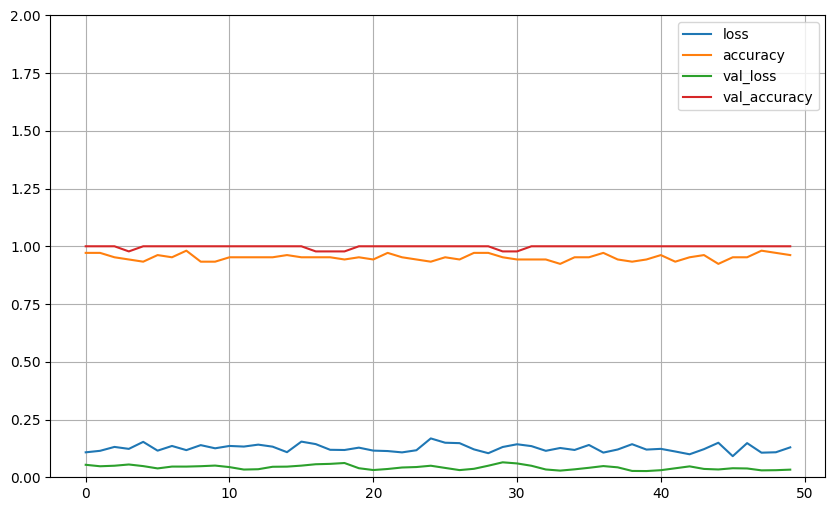

In [ ]:
# Plot the training and validation accuracy over epochs
pd.DataFrame(history.history).plot(figsize=(10, 6))
plt.grid(True)
plt.gca().set_ylim(0,2)
plt.show()

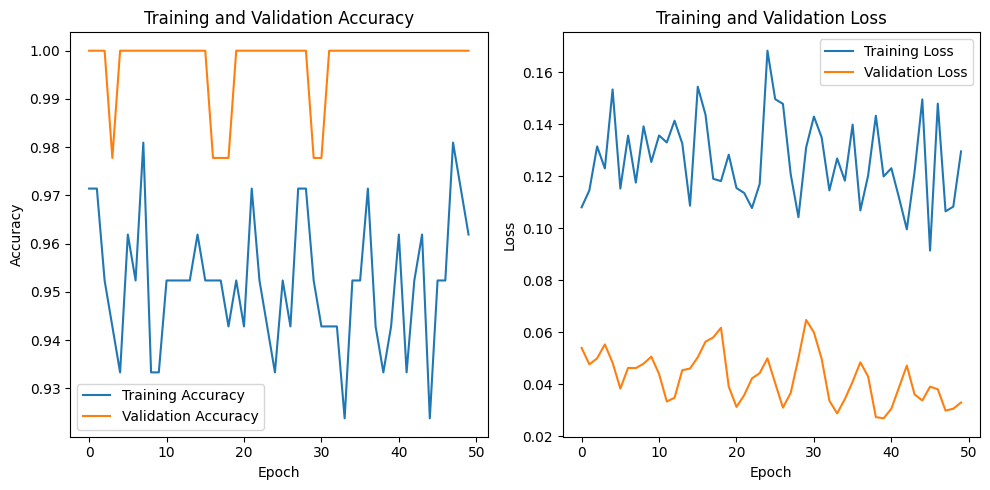

In [ ]:
# Plot training and validation accuracy over epochs
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()
